In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [2]:
%run _libraries.ipynb

In [3]:
%run _functions.ipynb

In [4]:
dir_current = '04-cv-research'

In [5]:
dir_save_files = 'files/'

In [6]:
dir_load_files = 'files/'

In [7]:
dir_save_img = 'docs/img/'

In [8]:
session_name = dir_current

# Section IV. CV Research

## Load Saved Section if exists

## Load Data

In [9]:
train = loadit('train_preprocessed', dir=dir_load_files)

In [10]:
valid = loadit('valid_preprocessed', dir=dir_load_files)

In [11]:
test = loadit('test_preprocessed', dir=dir_load_files)

In [12]:
cv_results = loadit('cv_results', dir=dir_load_files)

In [13]:
cv0 = cv_results['cv0'].copy()
cv1 = cv_results['cv1'].copy()
cv2 = cv_results['cv2'].copy()
cv3 = cv_results['cv3'].copy()

In [14]:
variables_dict = loadit('variables_dict', dir=dir_load_files)

In [15]:
target = variables_dict['target']
features = variables_dict['features']
order = variables_dict['order']
fourier_period = variables_dict['fourier_period']
fourier_order = variables_dict['fourier_order']
cv_indexes_train = variables_dict['cv_indexes_train']
cv_indexes_eval = variables_dict['cv_indexes_eval']

In [16]:
if os.path.exists(dir_load_files + 'cv4.pkl'):
    cv4 = loadit('cv4', dir=dir_load_files)
    print('CV results loaded')
else:
    print("CV results not found")

CV results loaded


## Cross-validation 3: Base Model

- Model: ARIMA (2, 1, 1)(144)(4)
- Train: February - June
- Eval: March - July

In [17]:
%%time
if 'cv4' in globals():
    cv4_results_df_raw = cv4.copy()
else:
    cv4_results_df_raw = cv_arima_evaluation(
        data=train,
        target=target,
        features=features,
        cv_indexes_train=cv_indexes_train,
        cv_indexes_eval=cv_indexes_eval,
        model_order=order,
        fourier_preiod=fourier_period,
        fourier_order=fourier_order)

CPU times: user 891 µs, sys: 605 µs, total: 1.5 ms
Wall time: 2.97 ms


In [18]:
cv4_results_df = cv4_results_df_raw.copy()

In [19]:
cv4_results_df['resid_diff'] = cv4_results_df['resid'].diff(1)

In [20]:
cv4_results_df['resid_return'] = cv4_results_df['resid'].pct_change(1).mul(100)

In [21]:
cv4_results_df['resid_rolling_1h'] =  cv4_results_df['resid'].rolling(6).median()

In [22]:
cv4_results_df['resid_rolling_6h'] =  cv4_results_df['resid'].rolling(72).median()

## CV Results Visualization

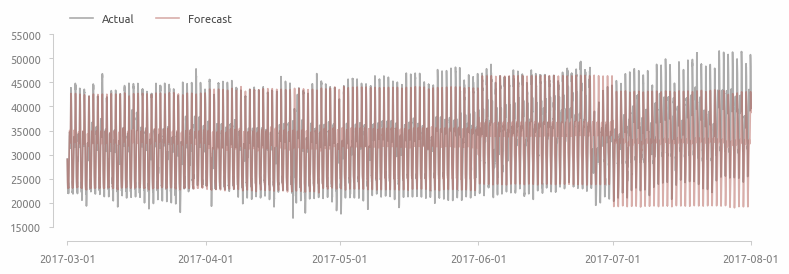

In [23]:
plt.figure(figsize=(9, 2.5))
plt.plot(
    cv4_results_df.loc['2017-03-01':, 'true'],
    color=palette[0], alpha=0.5, label='Actual')
plt.plot(
    cv4_results_df.loc[:, 'pred'],
    color=palette[1], alpha=0.5, label='Forecast')
axis_rstyle()

plt.legend(**legend_inline())

Images 'cv_results_close_3_5.png' and 'cv_results_close_3_5.svg' successfully saved into 'docs/img/' directory


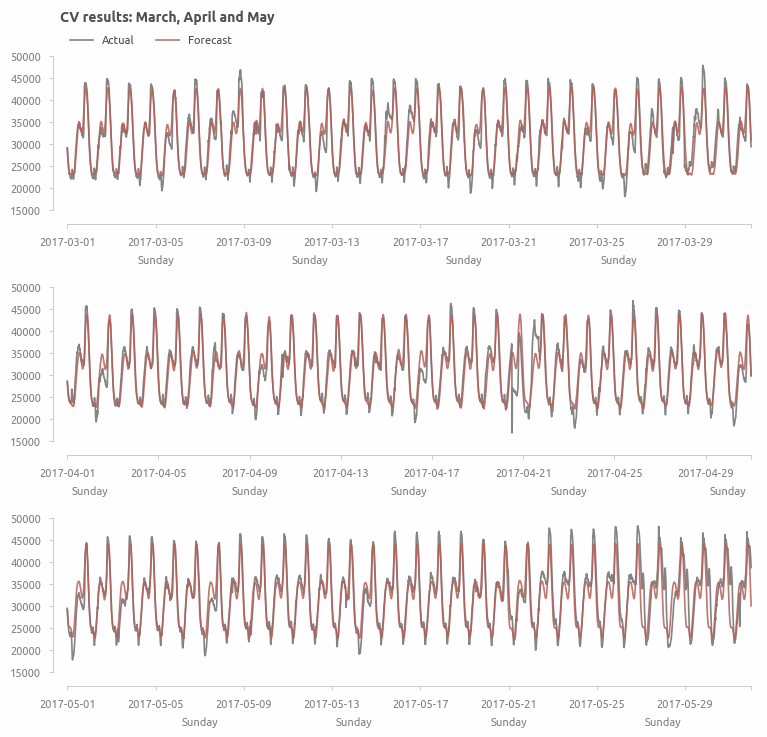

In [24]:
fig, ax = plt.subplots(3, 1, figsize=(9, 8))

ax[0].set_title('CV results: March, April and May', **title_inline)

ax[0].plot(
    cv4_results_df.loc['2017-03', 'true'],
    color=palette[0], alpha=0.75, label='Actual')
ax[0].plot(
    cv4_results_df.loc['2017-03', 'pred'],
    color=palette[1], alpha=0.85, label='Forecast')
axis_rstyle(ax=ax[0])
ax0_sec = axis_secondary(ax=ax[0])
ax0_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%A'))
ax0_sec.xaxis.set_major_locator(mpl.dates.WeekdayLocator(byweekday=mpl.dates.SU))
ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)
ax[0].legend(**legend_inline())

ax[1].plot(
    cv4_results_df.loc['2017-04', 'true'], color=palette[0], alpha=0.75)
ax[1].plot(
    cv4_results_df.loc['2017-04', 'pred'], color=palette[1], alpha=0.85)
axis_rstyle(ax=ax[1])
ax1_sec = axis_secondary(ax=ax[1])
ax1_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%A'))
ax1_sec.xaxis.set_major_locator(mpl.dates.WeekdayLocator(byweekday=mpl.dates.SU))
ax[1].xaxis.get_major_ticks()[-1].label1.set_visible(False)

ax[2].plot(
    cv4_results_df.loc['2017-05', 'true'], color=palette[0], alpha=0.75)
ax[2].plot(
    cv4_results_df.loc['2017-05', 'pred'], color=palette[1], alpha=0.85)
axis_rstyle(ax=ax[2])
ax2_sec = axis_secondary(ax=ax[2])
ax2_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%A'))
ax2_sec.xaxis.set_major_locator(mpl.dates.WeekdayLocator(byweekday=mpl.dates.SU))
ax[2].xaxis.get_major_ticks()[-1].label1.set_visible(False)

plt.subplots_adjust(hspace=0.5)

savefig('cv_results_close_3_5', dir_save_img)

Images 'cv_results_close_6_7.png' and 'cv_results_close_6_7.svg' successfully saved into 'docs/img/' directory


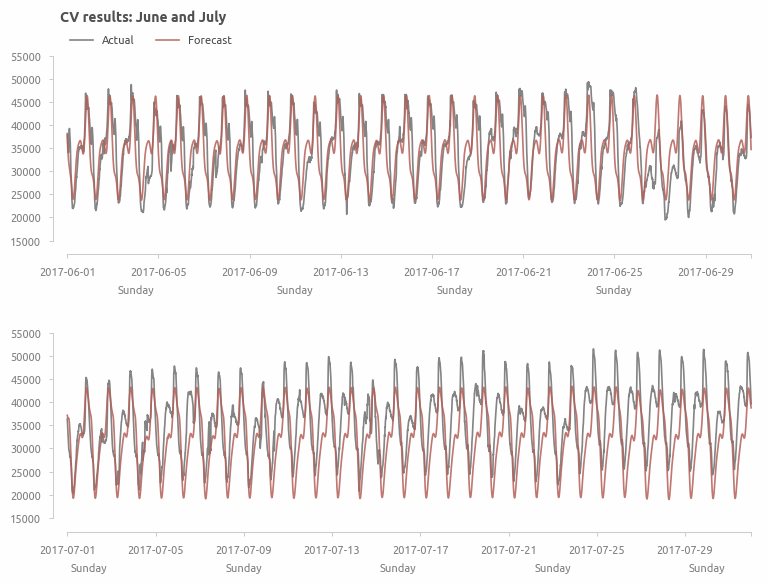

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6))

ax[0].set_title('CV results: June and July', **title_inline)

ax[0].plot(
    cv4_results_df.loc['2017-06', 'true'],
    color=palette[0], alpha=0.75, label='Actual')
ax[0].plot(
    cv4_results_df.loc['2017-06', 'pred'],
    color=palette[1], alpha=0.85, label='Forecast')
axis_rstyle(ax=ax[0])
ax0_sec = axis_secondary(ax=ax[0])
ax0_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%A'))
ax0_sec.xaxis.set_major_locator(mpl.dates.WeekdayLocator(byweekday=mpl.dates.SU))
ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)
ax[0].legend(**legend_inline())

ax[1].plot(
    cv4_results_df.loc['2017-07', 'true'], color=palette[0], alpha=0.75)
ax[1].plot(
    cv4_results_df.loc['2017-07', 'pred'], color=palette[1], alpha=0.85)
axis_rstyle(ax=ax[1])
ax1_sec = axis_secondary(ax=ax[1])
ax1_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%A'))
ax1_sec.xaxis.set_major_locator(mpl.dates.WeekdayLocator(byweekday=mpl.dates.SU))
ax[1].xaxis.get_major_ticks()[-1].label1.set_visible(False)

plt.subplots_adjust(hspace=0.5)
plt.show()

savefig('cv_results_close_6_7', dir_save_img)

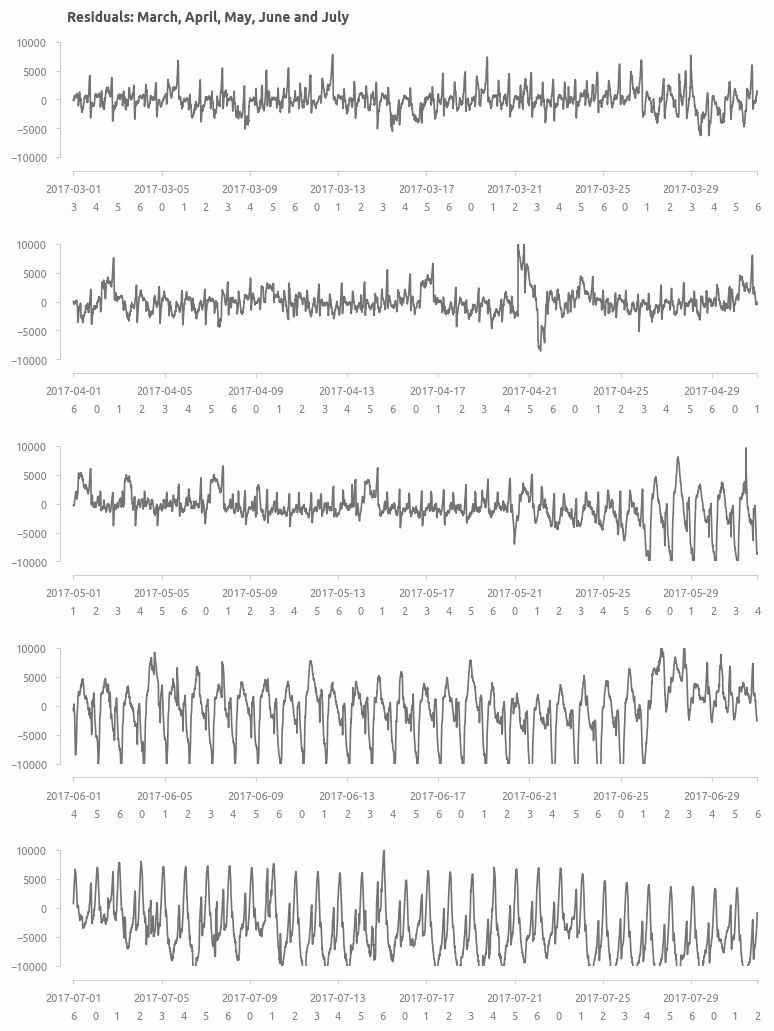

Images 'cv_results_close2.png' and 'cv_results_close2.svg' successfully saved into 'docs/img/' directory


In [26]:
fig, ax = plt.subplots(5, 1, figsize=(9, 12))

ax[0].set_title('Residuals: March, April, May, June and July')

ax[0].plot(
    cv4_results_df.loc['2017-03', 'resid'], color=palette[0], alpha=0.85)
axis_rstyle(ax=ax[0], ylim=[-10000, 10000], yticks=[-10000, 10000, 5000])
ax0_sec = axis_secondary(ax=ax[0])
ax0_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%w'))
ax0_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)

ax[1].plot(
    cv4_results_df.loc['2017-04', 'resid'], color=palette[0], alpha=0.85)
axis_rstyle(ax=ax[1], ylim=[-10000, 10000], yticks=[-10000, 10000, 5000])
ax1_sec = axis_secondary(ax=ax[1])
ax1_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%w'))
ax1_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[1].xaxis.get_major_ticks()[-1].label1.set_visible(False)

ax[2].plot(
    cv4_results_df.loc['2017-05', 'resid'], color=palette[0], alpha=0.85)
axis_rstyle(ax=ax[2], ylim=[-10000, 10000], yticks=[-10000, 10000, 5000])
ax2_sec = axis_secondary(ax=ax[2])
ax2_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%w'))
ax2_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[2].xaxis.get_major_ticks()[-1].label1.set_visible(False)

ax[3].plot(
    cv4_results_df.loc['2017-06', 'resid'], color=palette[0], alpha=0.85)
axis_rstyle(ax=ax[3], ylim=[-10000, 10000], yticks=[-10000, 10000, 5000])
ax3_sec = axis_secondary(ax=ax[3])
ax3_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%w'))
ax3_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[3].xaxis.get_major_ticks()[-1].label1.set_visible(False)

ax[4].plot(
    cv4_results_df.loc['2017-07', 'resid'], color=palette[0], alpha=0.85)
axis_rstyle(ax=ax[4], ylim=[-10000, 10000], yticks=[-10000, 10000, 5000])
ax4_sec = axis_secondary(ax=ax[4])
ax4_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%w'))
ax4_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[4].xaxis.get_major_ticks()[-1].label1.set_visible(False)

plt.subplots_adjust(hspace=0.75)
plt.show()

savefig('cv_results_close2', dir_save_img)

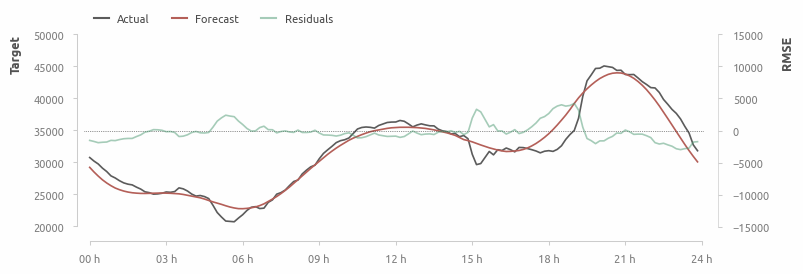

In [29]:
fig, ax = plt.subplots()

ax.set_ylabel('Target')
p1 = ax.plot(
    cv4_results_df.loc['2017-05-13', 'true'],
    color=palette[0], label='Actual')
p2 = ax.plot(
    cv4_results_df.loc['2017-05-13', 'pred'],
    color=palette[1], label='Forecast')
axis_rstyle(yticks=[20000, 50000])
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H h'))
ticklabels_f_modify(-1, '24 h')

ax2 = add_twinx(ylim=[-15000, 15000], yticks=[-15000, 15001, 5000])
ax2.set_ylabel('RMSE')
ax2.axhline(0, lw=0.5, ls=':', color=palette[-5])
p3 = ax2.plot(
    cv4_results_df.loc['2017-05-13', 'resid'],
    color=palette[3], alpha=0.5, label='Residuals')

plt.legend(
    **legend_inline(3),
    **legend_create_handles(
        3, kind='line',
        colors=[palette[0], palette[1], palette[3]],
        alphas=[1, 1, 0.5],
        labels=['Actual', 'Forecast', 'Residuals']))

plt.show()


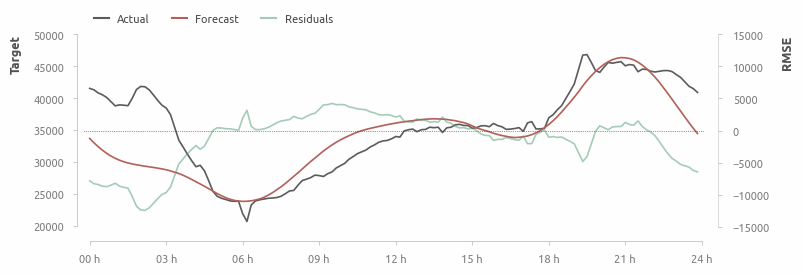

In [30]:
fig, ax = plt.subplots()

ax.set_ylabel('Target')
p1 = ax.plot(
    cv4_results_df.loc['2017-06-13', 'true'],
    color=palette[0], label='Actual')
p2 = ax.plot(
    cv4_results_df.loc['2017-06-13', 'pred'],
    color=palette[1], label='Forecast')
axis_rstyle(yticks=[20000, 50000])
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H h'))
ticklabels_f_modify(-1, '24 h')

ax2 = add_twinx(ylim=[-15000, 15000], yticks=[-15000, 15001, 5000])
ax2.set_ylabel('RMSE')
ax2.axhline(0, lw=0.5, ls=':', color=palette[-5])
p3 = ax2.plot(
    cv4_results_df.loc['2017-06-13', 'resid'],
    color=palette[3], alpha=0.5, label='Residuals')

plt.legend(
    **legend_inline(3),
    **legend_create_handles(
        3, kind='line',
        colors=[palette[0], palette[1], palette[3]],
        alphas=[1, 1, 0.5],
        labels=['Actual', 'Forecast', 'Residuals']))

plt.show()


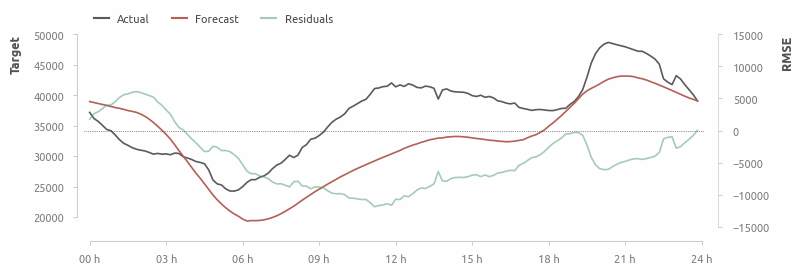

In [43]:
fig, ax = plt.subplots()

ax.set_ylabel('Target')
p1 = ax.plot(
    cv4_results_df.loc['2017-07-13', 'true'],
    color=palette[0], label='Actual')
p2 = ax.plot(
    cv4_results_df.loc['2017-07-13', 'pred'],
    color=palette[1], label='Forecast')
axis_rstyle(yticks=[20000, 50000])
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H h'))
ticklabels_f_modify(-1, '24 h')

ax2 = add_twinx(ylim=[-15000, 15000], yticks=[-15000, 15001, 5000])
ax2.set_ylabel('RMSE')
ax2.axhline(0, lw=0.5, ls=':', color=palette[-5])
p3 = ax2.plot(
    cv4_results_df.loc['2017-07-13', 'resid'],
    color=palette[3], alpha=0.5, label='Residuals')

plt.legend(
    **legend_inline(3),
    **legend_create_handles(
        3, kind='line',
        colors=[palette[0], palette[1], palette[3]],
        alphas=[1, 1, 0.5],
        labels=['Actual', 'Forecast', 'Residuals']))

plt.show()


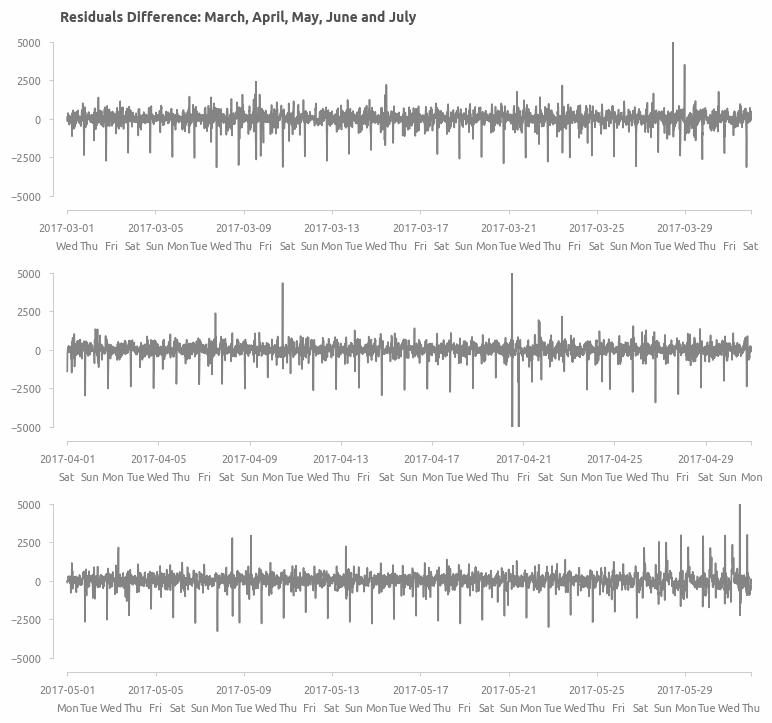

In [32]:
fig, ax = plt.subplots(3, 1, figsize=(9, 8))

ax[0].set_title('Residuals Difference: March, April, May, June and July')

ax[0].plot(
    cv4_results_df.loc['2017-03-01':'2017-03-31', 'resid_diff'], color=palette[0], alpha=0.75)
axis_rstyle(ax=ax[0], yticks=[-5000, 5000, 2500], ylim=[-5000, 5000])
ax0_sec = axis_secondary(ax=ax[0])
ax0_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%a'))
ax0_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)

ax[1].plot(
    cv4_results_df.loc['2017-04-01':'2017-04-30', 'resid_diff'], color=palette[0], alpha=0.75)
axis_rstyle(ax=ax[1], yticks=[-5000, 5000, 2500], ylim=[-5000, 5000])
ax1_sec = axis_secondary(ax=ax[1])
ax1_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%a'))
ax1_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[1].xaxis.get_major_ticks()[-1].label1.set_visible(False)

ax[2].plot(
    cv4_results_df.loc['2017-05-01':'2017-05-31', 'resid_diff'], color=palette[0], alpha=0.75)
axis_rstyle(ax=ax[2], yticks=[-5000, 5000, 2500], ylim=[-5000, 5000])
ax2_sec = axis_secondary(ax=ax[2])
ax2_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%a'))
ax2_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[2].xaxis.get_major_ticks()[-1].label1.set_visible(False)

plt.subplots_adjust(hspace=0.5)
plt.show()

# savefig('cv_results_close2', dir_save_img)

In [33]:
cv4_results_df.loc['2017-03-01':'2017-03-10', 'resid_diff'].rolling(2).sum()

2017-03-01 00:00:00           NaN
2017-03-01 00:10:00           NaN
2017-03-01 00:20:00     15.350771
2017-03-01 00:30:00    249.275589
2017-03-01 00:40:00    -33.986234
                          ...    
2017-03-10 23:10:00    223.738829
2017-03-10 23:20:00    160.728391
2017-03-10 23:30:00    466.116290
2017-03-10 23:40:00    336.298345
2017-03-10 23:50:00    -23.331108
Freq: 10min, Name: resid_diff, Length: 1440, dtype: float64

In [34]:
cv4_results_df.loc['2017-03-01':'2017-03-10', 'resid_diff']

2017-03-01 00:00:00           NaN
2017-03-01 00:10:00   -135.906023
2017-03-01 00:20:00    151.256794
2017-03-01 00:30:00     98.018795
2017-03-01 00:40:00   -132.005030
                          ...    
2017-03-10 23:10:00    -68.454009
2017-03-10 23:20:00    229.182400
2017-03-10 23:30:00    236.933890
2017-03-10 23:40:00     99.364454
2017-03-10 23:50:00   -122.695563
Freq: 10min, Name: resid_diff, Length: 1440, dtype: float64

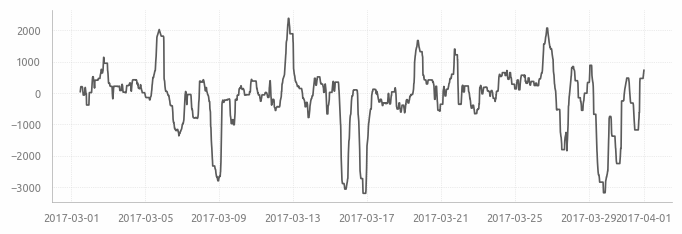

In [35]:
plt.plot(
    cv4_results_df.loc['2017-03', 'resid'].rolling(72).median(), color=palette[0])

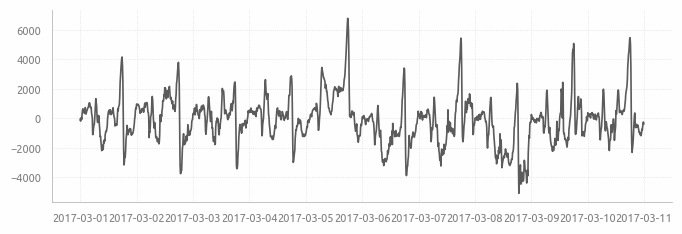

In [36]:
plt.plot(
    cv4_results_df.loc['2017-03-01':'2017-03-10', 'resid'], color=palette[0])

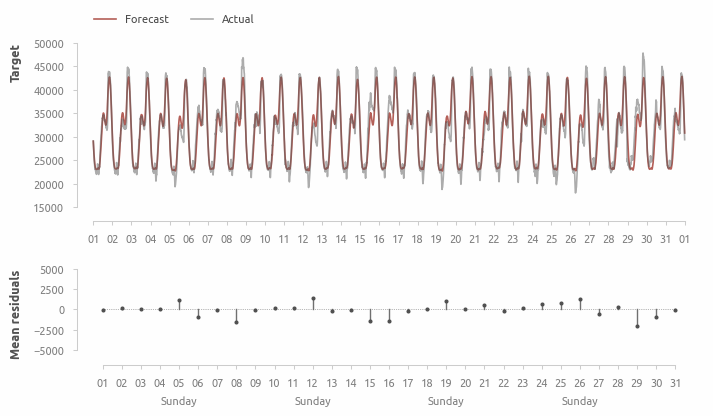

In [37]:
resid_mean_data =  cv4_results_df.loc['2017-03']
resid_mean = resid_mean_data.groupby(resid_mean_data.index.floor('D')).mean()

fig, ax = plt.subplots(2, 1, figsize=(8, 4), height_ratios=[2, 1])

ax[0].plot(
    resid_mean_data['pred'].index, resid_mean_data['pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    resid_mean_data['true'].index, resid_mean_data['true'],
    color=palette[0], alpha=0.5, label='Actual')

ax[0].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%d'))
ax[0].xaxis.set_major_locator(mpl.dates.DayLocator())

ax[0].set_xlim(
    resid_mean_data['pred'].index[0]-dt.timedelta(days=0.5),
    resid_mean_data['pred'].index[-1]+dt.timedelta(days=1))
ax[0].set_ylabel('Target')
axis_rstyle(ax=ax[0])
ax[0].legend(**legend_inline(bbox_to_anchor=(0, 1.05)))

for i in resid_mean.index:
    ax[1].plot([i, i], [0, resid_mean.loc[i, 'resid']], color=palette[-3], lw=1)
    ax[1].scatter(i, resid_mean.loc[i, 'resid'], s=15, color=palette[-4], zorder=10)

ax[1].plot(
    [resid_mean.index[0], resid_mean.index[-1]],
    [0, 0],
    lw=0.5, ls=':', color=palette[-3])

ax[1].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%d'))
ax[1].xaxis.set_major_locator(mpl.dates.DayLocator())
ax1_axis_sec =  ax[1].secondary_xaxis('bottom')
ax1_axis_sec.spines['bottom'].set_visible(False)
ax1_axis_sec.tick_params(pad=32, bottom=False, colors='#808080')
ax1_axis_sec.xaxis.set_major_locator(mpl.dates.WeekdayLocator(mpl.dates.SU))
ax1_axis_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%A'))

ax[1].set_xlim(
    resid_mean_data['pred'].index[0]-dt.timedelta(days=1),
    resid_mean_data['pred'].index[-1]+dt.timedelta(days=0.5))
ax[1].set_ylabel('Mean residuals')

axis_rstyle(xslice=[1, -1], yticks=[-5000, 5000, 2500], ylim=[-5100, 5000], ax=ax[1])

plt.subplots_adjust(hspace=0.5)
plt.show()

## Save Data

In [38]:
saveit(cv4_results_df_raw, 'cv4', dir_save_files)

File 'cv4.pkl' saved in directory 'files/'


### Execution time

In [39]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:01:30
